In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import statistics
import scipy.stats as sts
n = 16
a = -1
gamma = 0.9
sigma = 4
M= 1950

In [3]:
sample = np.random.normal(a, sigma, n)#создание выборки
mean = statistics.mean(sample)

1.1 Интервальная оценка, если дисперсия известна

In [4]:
t = (1 + gamma)/2
t_gamma=  sts.norm().ppf(t)


delta = t_gamma * sigma/math.sqrt(n)
I_left = mean - delta
I_right = mean + delta
print("доверительный интервал, найденный вручную: ", I_left, I_right)

доверительный интервал, найденный вручную:  -2.7070430156671064 0.5826642382358378


In [5]:
interval = sts.norm.interval(gamma, mean, sigma/math.sqrt(n))
print("доверительный интервал, найденный python: ", interval)

доверительный интервал, найденный python:  (-2.7070430156671073, 0.5826642382358378)


1.2 Интервальная оценка, если дисперсия НЕ известна

In [6]:
## S = sqrt((Σ(xi - x̄)²) / (n - 1))

t_alpha_over_2 = sts.t.ppf(1 - (1 - gamma) / 2, df=n-1)
print(t_alpha_over_2)

sigma_estimate=statistics.stdev(sample)
print(sigma_estimate)

# Вычисляем стандартную ошибку среднего значения
standard_error = sigma_estimate / np.sqrt(len(sample))


interval_estimate = (mean - t_alpha_over_2 * standard_error, mean + t_alpha_over_2 * standard_error)

print("Доверительный интервал при неизвестной дисперсии:\n", interval_estimate)


1.7530503556925547
4.199814165310189
Доверительный интервал при неизвестной дисперсии:
 (-2.9028108178005487, 0.7784320403692797)


In [7]:
##confidence_interval = stats.t.interval(confidence_level, degrees_of_freedom, loc=x_bar, scale=S)

interval_2 = sts.t.interval(gamma, df=n-1, loc=mean, scale= standard_error )
print("\nдоверительный интервал, найденный python: \n", interval_2)


доверительный интервал, найденный python: 
 (-2.902810817800549, 0.7784320403692797)


1.3 Интервальная оценка для дисперсии 

In [8]:
##sample_variance = Σ(xi - x̄)² / (n - 1)
variance_estimate = np.var(sample, ddof=1)
print(variance_estimate)

# Вычисляем критические значения для хи-квадрат распределения
q1 = (1-gamma)/2
q2 = (1+gamma)/2
x_1 = sts.chi2.ppf(q1,n-1)
x_2 = sts.chi2.ppf(q2,n-1)

# Вычисляем интервальную оценку для дисперсии
I_leftm = (n-1)*variance_estimate/x_2
I_rightm = (n-1)*variance_estimate/x_1
print("доверительный интервал, найденный вручную: ", I_leftm, I_rightm)

17.63843902314012
доверительный интервал, найденный вручную:  10.584845842763759 36.43831821078419


2 Построить зависимости длины доверительного интервала от надежности при неизменном объеме выборки. 

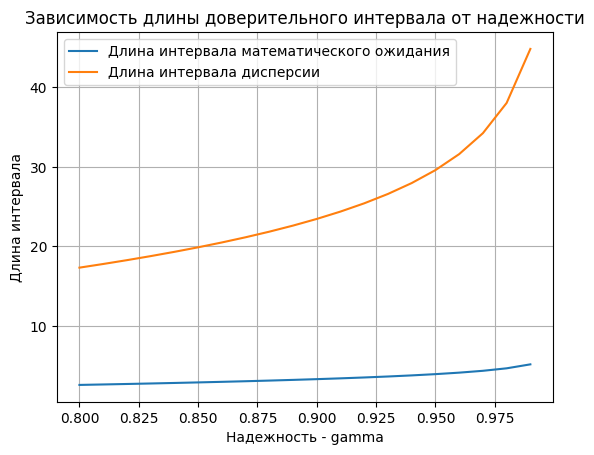

In [9]:
confidence_levels = np.linspace(0.80, 0.99, 20)

# Создайте списки для хранения длин интервалов для мат. ожидания и дисперсии
lengths_mean = []
lengths_variance = []

# Вычислите длины доверительных интервалов для каждого уровня доверия
for confidence_level in confidence_levels:
    # Вычисляем интервальную оценку для математического ожидания
    mean_interval = sts.norm.interval(confidence_level, loc=a, scale=sigma / np.sqrt(n))
    
    # Вычисляем интервальную оценку для дисперси
    variance_estimate = sigma**2
    chi2_lower, chi2_upper = sts.chi2.interval(confidence_level, n-1)
    variance_interval = ((n-1) * variance_estimate / chi2_upper,
                         (n-1) * variance_estimate / chi2_lower)
    
    # Вычисляем длину интервалов и добавляем их в списки
    lengths_mean.append(mean_interval[1] - mean_interval[0])
    lengths_variance.append(variance_interval[1] - variance_interval[0])


plt.plot(confidence_levels, lengths_mean, label="Длина интервала математического ожидания")
plt.plot(confidence_levels, lengths_variance, label="Длина интервала дисперсии")
plt.xlabel("Надежность - gamma")
plt.ylabel("Длина интервала")
plt.legend()
plt.grid()
plt.title("Зависимость длины доверительного интервала от надежности")
plt.show()

3 Построить зависимости длины доверительного интервала от объема выборки при неизменной надежности

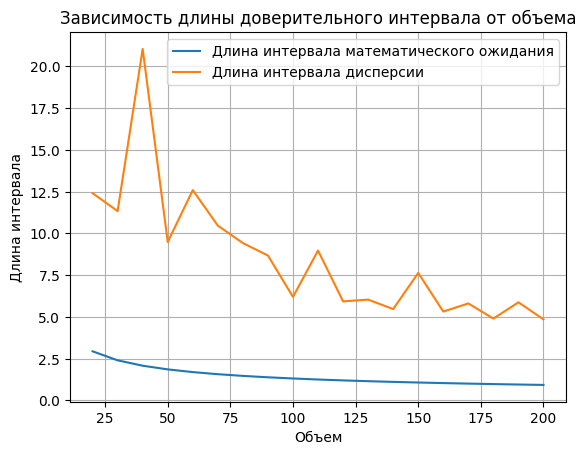

In [10]:
m_list = np.arange(20, 201, 10)
# Списки для хранения длин интервалов для математического ожидания и дисперсии
lengths_mean = []
lengths_variance = []

for m in m_list:
    sample_item = np.random.normal(a, sigma, m)
    # Вычисляем интервальную оценку для математического ожидания
    mean_interval = sts.norm.interval(gamma, loc=sample_item.mean(), scale=sigma / np.sqrt(m))
    
    # Вычисляем интервальную оценку для дисперси
    variance_estimate = np.var(sample_item, ddof=1)
    chi2_lower, chi2_upper = sts.chi2.interval(gamma, m-1)
    variance_interval = ((m-1) * variance_estimate / chi2_upper,
                         (m-1) * variance_estimate / chi2_lower)
    
    # Вычисляем длину интервалов и добавляем их в списки
    lengths_mean.append(mean_interval[1] - mean_interval[0])
    lengths_variance.append(variance_interval[1] - variance_interval[0])


plt.plot(m_list, lengths_mean, label="Длина интервала математического ожидания")
plt.plot(m_list, lengths_variance, label="Длина интервала дисперсии")
plt.xlabel("Объем")
plt.ylabel("Длина интервала")
plt.legend()
plt.grid()
plt.title("Зависимость длины доверительного интервала от объема")
plt.show()

4 Смоделировать M=1000 выборок из n=16 значений нормально распределенной случайной величины X с параметрами (a,sigma). По каждой из M выборок с надежностью gamma найти интервальную оценку (доверительный интервал) для математического ожидания случайной величины X, предполагая, что дисперсия случайной величины X неизвестна. По результатам моделирования найти точечную оценку надежности gamma

In [20]:
count = 0.0
M = 1000
N = 1000
for j in range(0,M):
    sample = np.random.normal(a, sigma, N)#создание выборки

    mean = statistics.mean(sample)
    SEM= sts.sem(sample) # стандартная ошибка среднего

    S= np.sqrt(np.var(sample,ddof=1))

    interval = sts.t.interval(gamma, N-1, mean, S/math.sqrt(N))
 
    if interval[0]<a and interval[1]>a:
        count +=1

GAMMA = count/M
print(GAMMA)
print(gamma)

0.899
0.9


5. Моделирование М выборок 

In [12]:
z_list = []
for j in range(0,M):
    sample_i = np.random.normal(a, sigma, n)
    z_list.append(sample_i)

5.1 По каждой из M выборок найти наблюдаемое значение случайной величины Z

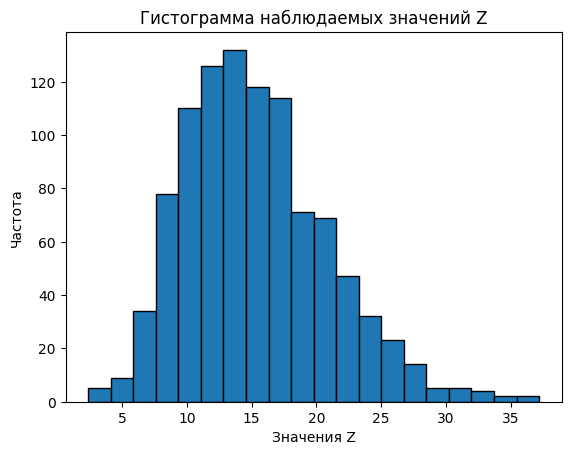

In [13]:
# Xср = (1/n) * ΣXi
# S^2 = (1/(n-1)) * Σ(Xi - Xср)^2
# Z = ((n - 1) * S^2) / (σ^2)

# Создим список для хранения наблюдаемых значений Z
observed_values_of_Z = []

# Моделирование M выборок
for i in range(M):
    
    # Вычисляем среднее значение Xср
    X_avg = np.mean(z_list[i])
    
    # Вычисляем S^2
    S_squared = np.sum((z_list[i] - X_avg)**2) / (n - 1)
    
    # Вычисляем наблюдаемое значение Z
    Z = ((n - 1) * S_squared) / (sigma**2)
    
    observed_values_of_Z.append(Z)

# Строим гистограмму
plt.hist(observed_values_of_Z, bins=20, edgecolor='k')
plt.xlabel("Значения Z")
plt.ylabel("Частота")
plt.title("Гистограмма наблюдаемых значений Z")
plt.show()

5.2

Z будет иметь распределение хи-квадрат с (16 - 1) = 15 степенями свободы.

5.3

In [14]:

# Вычисляем среднее значение
mean_Z = np.mean(observed_values_of_Z)

# Вычисляем дисперсию
variance_Z = np.var(observed_values_of_Z)

# Вычисляем стандартное отклонение
std_deviation_Z = np.std(observed_values_of_Z)

# Вычисляем медиану
median_Z = np.median(observed_values_of_Z)

# Вычисляем минимальное и максимальное значения
min_Z = np.min(observed_values_of_Z)
max_Z = np.max(observed_values_of_Z)

# Выводим результат
print("Среднее значение Z:", mean_Z)
print("Дисперсия Z:", variance_Z)
print("Стандартное отклонение Z:", std_deviation_Z)
print("Медиана Z:", median_Z)
print("Минимальное значение Z:", min_Z)
print("Максимальное значение Z:", max_Z)

Среднее значение Z: 15.306839405927537
Дисперсия Z: 30.050266139636726
Стандартное отклонение Z: 5.481812304305642
Медиана Z: 14.655688172486748
Минимальное значение Z: 2.367941466215515
Максимальное значение Z: 37.20030169405056


5.4 Гистограмма относительных частот и теоретическая кривая
распределения случайной величины Z, а также бокс-плот.

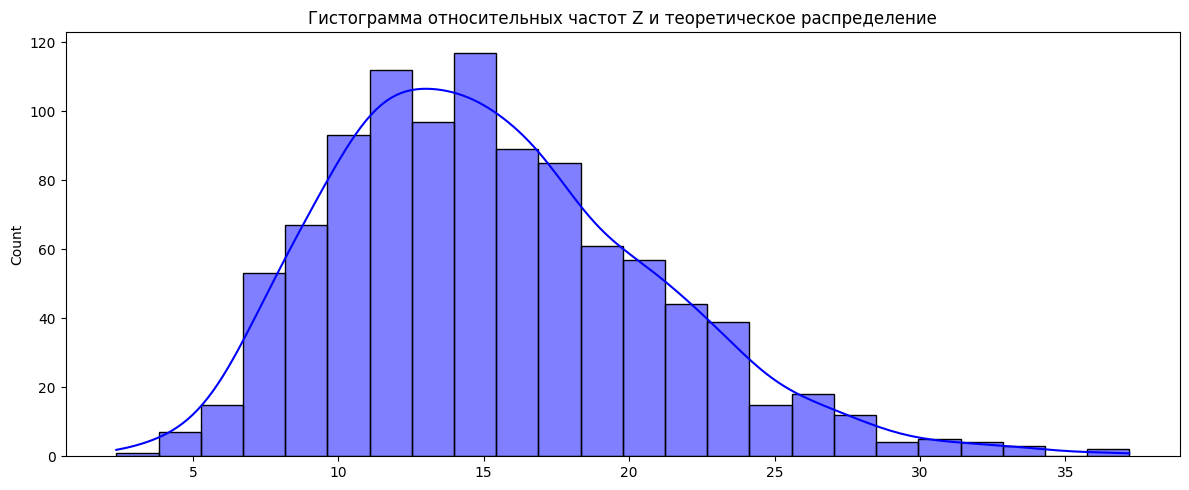

In [15]:
import seaborn as sns
# Гистограмма относительных частот
plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
sns.histplot(observed_values_of_Z, kde=True, color='blue')
plt.title("Гистограмма относительных частот Z и теоретическое распределение")

plt.tight_layout()
plt.show()



<Axes: >

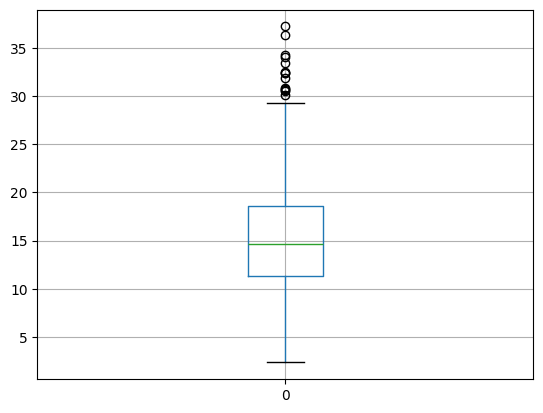

In [16]:
import pandas as pd
#plt.boxplot(data)
data_frame = pd.DataFrame(observed_values_of_Z)
data_frame.boxplot()